In [24]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import keras.models
import keras.layers
import tensorflow as tf

import pandas as pd
import numpy as np
import sklearn.model_selection as model_selection

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score


from keras import datasets, utils, layers, models, optimizers
from keras.callbacks import ModelCheckpoint

In [25]:
train = pd.read_csv('/Users/hasannaseer/Downloads/MINST/sign_mnist_train.csv')
test = pd.read_csv('/Users/hasannaseer/Downloads/MINST/sign_mnist_test.csv')

In [26]:
#storing labels
labels = train['label'].values
images = train.drop('label', axis=1)
images = images.values
images = np.array([np.reshape(x, (28, 28)) for x in images])
images = np.array([x.flatten() for x in images])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [28]:
print('X-train: ', x_train.shape)
print('X-test: ', x_test.shape)

X-train:  (19218, 784)
X-test:  (8237, 784)


In [29]:
x_train = x_train / 255
x_test = x_test / 255

In [30]:
#Reshaping the labels 
binrizer = LabelBinarizer()
labels = binrizer.fit_transform(labels)
print (labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [31]:
#Adding bias in the Neural Net and giving a reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(19218, 28, 28, 1)
(8237, 28, 28, 1)


This checks the training data to verify class labels and columns representing pixels. 

In [32]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Now, here is the implementation of the model defination and model training using Keras for my CNN.

In [33]:
batch_size = 128
num_classes = 26
epochs = 10
model = Sequential()

#Implementation of CNN using Keras
model.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [34]:
#model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Loss
              metrics=['accuracy'])

In [35]:
print("Fit model on training data")
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs, batch_size = batch_size, validation_split = 0.1)
# history = model.fit(x_train, y_train, batch_size=64, epochs=2,
# #     We pass some validation for
# #     monitoring validation loss and metrics
# #     at the end of each epoch
#    validation_data=(x_train, x_train),
# )

Fit model on training data
Epoch 1/10
136/136 [==============================] - 4s 29ms/step - loss: 3.1679 - accuracy: 0.0646 - val_loss: 2.2568 - val_accuracy: 0.2924
Epoch 2/10
136/136 [==============================] - 4s 28ms/step - loss: 1.9582 - accuracy: 0.3568 - val_loss: 1.1646 - val_accuracy: 0.6363
Epoch 3/10
136/136 [==============================] - 4s 28ms/step - loss: 1.1520 - accuracy: 0.6102 - val_loss: 0.8096 - val_accuracy: 0.7357
Epoch 4/10
136/136 [==============================] - 4s 29ms/step - loss: 0.8284 - accuracy: 0.7135 - val_loss: 0.6205 - val_accuracy: 0.7940
Epoch 5/10
136/136 [==============================] - 4s 28ms/step - loss: 0.6515 - accuracy: 0.7746 - val_loss: 0.4561 - val_accuracy: 0.8486
Epoch 6/10
136/136 [==============================] - 4s 28ms/step - loss: 0.5036 - accuracy: 0.8298 - val_loss: 0.3676 - val_accuracy: 0.8777
Epoch 7/10
136/136 [==============================] - 4s 28ms/step - loss: 0.4109 - accuracy: 0.8595 - val_loss: 0.

In [36]:
# inputs = layers.Input(shape=(28, 28, 1))
# net = layers.Conv2D(28, kernel_size=(3, 3), padding='same')(inputs)
# net = layers.Activation('relu')(net)
# net = layers.BatchNormalization()(net)
# net = layers.MaxPooling2D(pool_size=(2,2))(net)

# net = layers.Conv2D(64, kernel_size=(3, 3), padding='same')(net)
# net = layers.Activation('relu')(net)
# net = layers.BatchNormalization()(net)
# net = layers.MaxPooling2D(pool_size=(2,2))(net)
# net = layers.Dropout(0.4)(net)

# net = layers.Flatten(input_shape=(28, 28,1))(net)
# net = layers.Dense(512)(net)
# net = layers.Activation('relu')(net)

# net = layers.Dropout(0.4)(net)
# net = layers.Dense(25)(net)
# prediction = layers.Activation('softmax')(net)

# model = models.Model(inputs=inputs, outputs=prediction)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

After our neural nets training, we added a visualization chart the training performance of the CNN model.

Text(0.5, 1.0, 'Accuracy evolution')

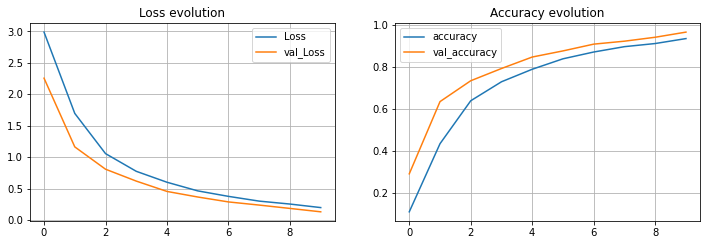

In [37]:
#Visualizing the training performance

plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [38]:
#Predictions for the test data
predicted_classes = np.argmax(model.predict(x_test), axis = -1)

The CNN model has predicted the class labels for the test images. These predictions will be visualized through a random plot.

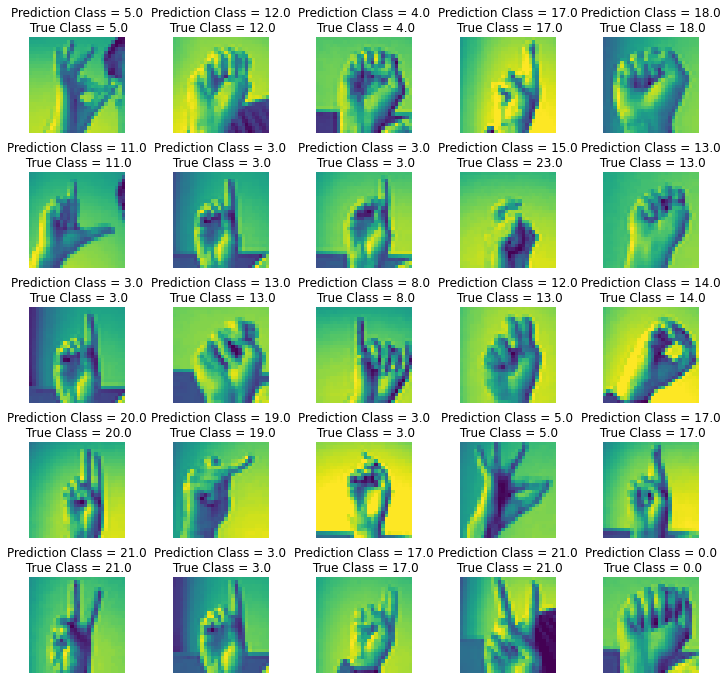

In [39]:
#Visualize predictions

fig, axes = plt.subplots(5, 5, figsize = (12,12))
axes = axes.ravel()

for x in np.arange(0, 25):  
    axes[x].imshow(x_test[x].reshape(28,28))
    axes[x].set_title(f"Prediction Class = {predicted_classes[x]:0.1f}\n True Class = {y_test[x]:0.1f}")
    axes[x].axis('off')
plt.subplots_adjust(wspace=0.5)

Before plotting the confusion matrix, we will specify the class labels.

In [40]:
score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ', score)

Accuracy Score =  0.971470195459512


In [41]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

#Non-Normalized Confusion Matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, title='Non-Normalized Confusion matrix')
plt.show()

TypeError: plot_confusion_matrix() got an unexpected keyword argument 'classes'

<Figure size 1440x1440 with 0 Axes>